In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
df.shape

(800, 13)

In [ ]:
df.drop("#" , axis = 1, inplace = True)

In [ ]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
generation_counts = df['Generation'].value_counts()
generation_5_count = generation_counts.get(5, 0)
print(generation_5_count)

165


In [ ]:
max_defense = df['Defense'].max()
pokemon_with_max_defense = df[df['Defense'] == max_defense]

number_of_pokemon_with_max_defense = len(pokemon_with_max_defense)
print(number_of_pokemon_with_max_defense)

3


In [ ]:
correlations = df.corr()['Generation'].drop('Generation')
non_related_columns = correlations[correlations.abs() < 0.1].index.tolist()

print(non_related_columns)

['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary']


<ipython-input-9-64b7ff14aa4e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()['Generation'].drop('Generation')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [ ]:
df['Type 1'].nunique()

18

In [ ]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [ ]:
df['Type 2'].nunique()

18

In [ ]:
df['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [ ]:
df.isnull().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [ ]:
mode_type_2 = df['Type 2'].mode()[0]  # Calculate the mode
df['Type 2'].fillna(mode_type_2, inplace=True)

In [ ]:
df.isnull().sum()

Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(drop = 'first', sparse = False)

In [ ]:
encoded_features = encoder.fit_transform(df[['Type 1', 'Type 2']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df_new = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Type 1', 'Type 2']))

In [ ]:
df1 = pd.concat([df, df_new], axis = 1)

In [ ]:
df1.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,...,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Charmander,Fire,Flying,309,39,52,43,60,50,65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df1['Legendary'] = df1['Legendary'].astype(int)

In [ ]:
X = df1.drop(['Legendary', 'Name', 'Type 1', 'Type 2'], axis=1)
y = df1['Legendary']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# logistic regression
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr_pred = lr.predict(X_test)

In [ ]:
lr_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import *

In [ ]:
acc = accuracy_score(y_test, lr_pred)
acc

0.9083333333333333

In [ ]:
cr = classification_report(y_test, lr_pred)

In [ ]:
cr

'              precision    recall  f1-score   support\n\n           0       0.92      0.98      0.95       219\n           1       0.43      0.14      0.21        21\n\n    accuracy                           0.91       240\n   macro avg       0.68      0.56      0.58       240\nweighted avg       0.88      0.91      0.89       240\n'

In [ ]:
from pprint import pprint
pprint(cr)

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.92      0.98      0.95       219\n'
 '           1       0.43      0.14      0.21        21\n'
 '\n'
 '    accuracy                           0.91       240\n'
 '   macro avg       0.68      0.56      0.58       240\n'
 'weighted avg       0.88      0.91      0.89       240\n')


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=1)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
dt_pred = dt.predict(X_test)

In [ ]:
acc_dt = accuracy_score(y_test, dt_pred)
acc_dt

0.9208333333333333

In [ ]:
cr_dt = classification_report(y_test, dt_pred)
cr_dt

'              precision    recall  f1-score   support\n\n           0       0.96      0.95      0.96       219\n           1       0.54      0.62      0.58        21\n\n    accuracy                           0.92       240\n   macro avg       0.75      0.78      0.77       240\nweighted avg       0.93      0.92      0.92       240\n'

In [ ]:
pprint(cr_dt)

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.96      0.95      0.96       219\n'
 '           1       0.54      0.62      0.58        21\n'
 '\n'
 '    accuracy                           0.92       240\n'
 '   macro avg       0.75      0.78      0.77       240\n'
 'weighted avg       0.93      0.92      0.92       240\n')


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=1)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
rf_pred = rf.predict(X_test)

In [ ]:
acc_rf = accuracy_score(y_test, rf_pred )

In [ ]:
acc_rf

0.9291666666666667

In [ ]:
cr_rf = classification_report(y_test, rf_pred)
cr_rf

'              precision    recall  f1-score   support\n\n           0       0.94      0.98      0.96       219\n           1       0.67      0.38      0.48        21\n\n    accuracy                           0.93       240\n   macro avg       0.80      0.68      0.72       240\nweighted avg       0.92      0.93      0.92       240\n'

In [ ]:
pprint(cr_rf)

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.94      0.98      0.96       219\n'
 '           1       0.67      0.38      0.48        21\n'
 '\n'
 '    accuracy                           0.93       240\n'
 '   macro avg       0.80      0.68      0.72       240\n'
 'weighted avg       0.92      0.93      0.92       240\n')


In [ ]:
# Compare predictions with true labels
true_positives = sum((dt_pred == 1) & (y_test == 1))
true_negatives = sum((dt_pred == 0) & (y_test == 0))
false_positives = sum((dt_pred == 1) & (y_test == 0))
false_negatives = sum((dt_pred == 0) & (y_test == 1))

# Calculate total correctly classified instances
total_correct = true_positives + true_negatives

In [ ]:
total_correct

221

In [ ]:
true_positives

13

In [ ]:
true_negatives

208

In [ ]:
false_positives

11

In [ ]:
false_negatives

8

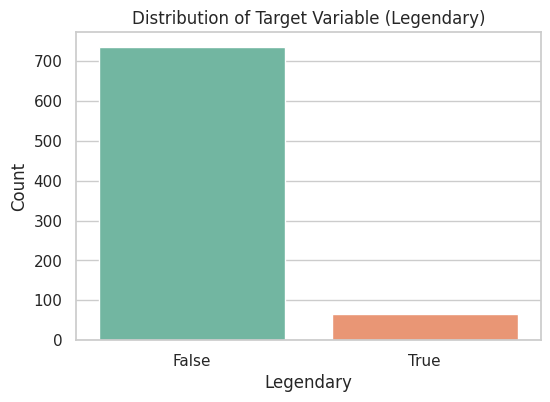

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Legendary', data=df, palette='Set2')
plt.title('Distribution of Target Variable (Legendary)')
plt.xlabel('Legendary')
plt.ylabel('Count')
plt.show()